# **3rd Fucking Approach**

Retrieving Dataset

In [ ]:
!pip install chess stockfish

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
!chmod +x /content/drive/MyDrive/stockfish/stockfish-ubuntu-x86-64-avx2
!ls -l /content/drive/MyDrive/stockfish/stockfish-ubuntu-x86-64-avx2

-rwx------ 1 root root 69200160 Feb 24 18:26 /content/drive/MyDrive/stockfish/stockfish-ubuntu-x86-64-avx2


In [ ]:
import chess
from stockfish import Stockfish
stockfish = Stockfish(path=r"/content/drive/MyDrive/stockfish/stockfish-ubuntu-x86-64-avx2")
import random
from pprint import pprint
import numpy as np
import os
import glob
import time

In [ ]:
#test checkmate:
board = chess.Board()
board.push_san("e4")
board.push_san("e5")
board.push_san("Qh5")
board.push_san("Nc6")
board.push_san("Bc4")
board.push_san("Nf6")
board.push_san("Qxf7")
board.is_checkmate()
# board

True

In [ ]:
#stockfish intro

#set pos from starting pos
# stockfish.set_position(["e2e4", "e7e6"])

#set pos from current pos:
# stockfish.make_moves_from_current_position(["g4d7", "a8b8", "f1d1"])

#get best move
stockfish.get_best_move()

# Get best move based on a time constraint
# stockfish.get_best_move_time(1000)

#get current board position with FEN encoding
stockfish.get_fen_position()

#reset board position:
#-> dont need this since we just add to moves

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

In [ ]:
#print chess board from fen position:
# fen = "r1b2rk1/pp2ppbp/1nP2np1/q2PN3/8/2N3P1/PP2PPBP/R1BQK2R b KQ - 2 10"
def fen_to_board(fen):
    board = []
    for row in fen.split('/'):
        brow = []
        for c in row:
            if c == ' ':
                break
            elif c in '12345678':
                brow.extend( ['--'] * int(c) )
            elif c == 'p':
                brow.append( 'bp' )
            elif c == 'P':
                brow.append( 'wp' )
            elif c > 'Z':
                brow.append( 'b'+c.upper() )
            else:
                brow.append( 'w'+c )

        board.append( brow )
    return board

# pprint( fen_to_board(fen) )

In [ ]:
#helper functions:
def checkEndCondition(board):
	if (board.is_checkmate() or board.is_stalemate() or board.is_insufficient_material() or board.can_claim_threefold_repetition() or board.can_claim_fifty_moves() or board.can_claim_draw()):
		return True
	return False




'''def saveData(moves, positions):
	moves = np.array(moves).reshape(-1, 1)
	positions = np.array(positions).reshape(-1,1)
	movesAndPositions = np.concatenate((moves, positions), axis = 1)

	nextIdx = findNextIdx()
	np.save(f"data/movesAndPositions{nextIdx}.npy", movesAndPositions)
	print("Saved successfully")'''


def saveData(moves, positions):
    moves = np.array(moves).reshape(-1, 1)
    positions = np.array(positions).reshape(-1, 1)
    movesAndPositions = np.concatenate((moves, positions), axis=1)

    nextIdx = findNextIdx()

    directory = f"data{nextIdx}"
    if not os.path.exists(directory):
        os.makedirs(directory)

    np.save(os.path.join(directory, f"movesAndPositions{nextIdx}.npy"), movesAndPositions)
    print("Saved successfully")



def runGame(numMoves, filename):
	"""run a game you stored"""
	testing = np.load(f"data1/{filename}")
	moves = testing[:, 0]
	if (numMoves > len(moves)):
		print("Must enter a lower number of moves than maximum game length. Game length here is: ", len(moves))
		return

	testBoard = chess.Board()

	for i in range(numMoves):
		move = moves[i]
		testBoard.push_san(move)
	return testBoard

def findNextIdx():
	files = (glob.glob(r"C:\Users\Lenovo\Desktop\Chess AI\New_Approach\data\*.npy"))
	if (len(files) == 0):
		return 1 #if no files, return 1
	highestIdx = 0
	for f in files:
		file = f
		currIdx = file.split("movesAndPositions")[-1].split(".npy")[0]
		highestIdx = max(highestIdx, int(currIdx))

	return int(highestIdx)+1

In [ ]:
def mineGames(numGames : int):
	"""mines numGames games of moves"""
	MAX_MOVES = 500 #don't continue games after this number

	for i in range(numGames):
		currentGameMoves = []
		currentGamePositions = []
		board = chess.Board()
		stockfish.set_position([])

		for i in range(MAX_MOVES):
			#randomly choose from those 3 moves
			moves = stockfish.get_top_moves(3)
			#if less than 3 moves available, choose first one, if none available, exit
			if (len(moves) == 0):
				print("game is over")
				break
			elif (len(moves) == 1):
				move = moves[0]["Move"]
			elif (len(moves) == 2):
				move = random.choices(moves, weights=(80, 20), k=1)[0]["Move"]
			else:
				move = random.choices(moves, weights=(80, 15, 5), k=1)[0]["Move"]

			currentGamePositions.append(stockfish.get_fen_position())
			currentGameMoves.append(move) #make sure to add str version of move before changing format
			move = chess.Move.from_uci(str(move)) #convert to format chess package likes
			board.push(move)
			stockfish.set_position(currentGameMoves)
			if (checkEndCondition(board)):
				print("game is over")
				break
		saveData(currentGameMoves, currentGamePositions)

In [ ]:
mineGames(10)

game is over
Saved successfully
game is over
Saved successfully
game is over
Saved successfully
game is over
Saved successfully
game is over
Saved successfully
game is over
Saved successfully
game is over
Saved successfully
game is over
Saved successfully
game is over
Saved successfully
game is over
Saved successfully


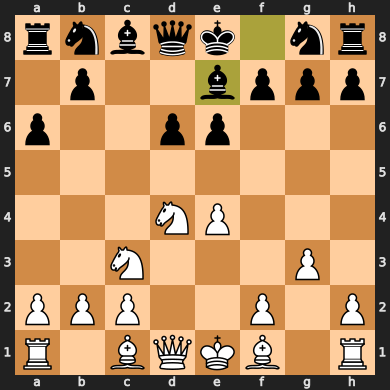

In [ ]:
#open a game and play it



testBoard = runGame(12, "movesAndPositions1.npy")
testBoard

Encoding

In [ ]:
!pip install gym gym_chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.8 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654618 sha256=994e00800e55b62e2beac4a6bd339dc856c7f6e211246edaf05102736a3a3ffb
  Stored in directory: /root/.cache/pip/wheels/af/4b/74/fcfc8238472c34d7f96508a63c962ff3ac9485a9a4137afd4e
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is t

In [ ]:
!git clone <repository_url>

In [ ]:
import numpy as np
import gym
import chess
import os
import gym.spaces
from gym_chess.alphazero.move_encoding import utils, queenmoves, knightmoves, underpromotions
from typing import List

env = gym.make('ChessAlphaZero-v0')

In [ ]:
#encoding from gym-chess
env = gym.make('ChessAlphaZero-v0')
env.reset()
print(env.observation_space)
print(env.action_space)

Box(0, 9223372036854775807, (8, 8, 119), int64)
Discrete(4672)


In [ ]:
#gym-chess environment:


#encode:
# move = chess.Move.from_uci('e2e4')
# env.encode(move)

#decode:
env = gym.make('ChessAlphaZero-v0')
env.reset()

env.decode(1000)


# env.legal_actions #moves with encoded notation
# env.legal_moves #moves with decoded notation

Move.from_uci('f2c5')

In [ ]:
#encoding func from alpha zero:


def encodeBoardFromFen(fen: str) -> np.array:
	board = chess.Board(fen)
	return encodeBoard(board)

def encodeBoard(board: chess.Board) -> np.array:
	"""Converts a board to numpy array representation."""

	array = np.zeros((8, 8, 14), dtype=int)

	for square, piece in board.piece_map().items():
		rank, file = chess.square_rank(square), chess.square_file(square)
		piece_type, color = piece.piece_type, piece.color

		# The first six planes encode the pieces of the active player,
		# the following six those of the active player's opponent. Since
		# this class always stores boards oriented towards the white player,
		# White is considered to be the active player here.
		offset = 0 if color == chess.WHITE else 6

		# Chess enumerates piece types beginning with one, which we have
		# to account for
		idx = piece_type - 1

		array[rank, file, idx + offset] = 1

	# Repetition counters
	array[:, :, 12] = board.is_repetition(2)
	array[:, :, 13] = board.is_repetition(3)

	return array


def decodeMove(move: int):
	return env.decode(move)

#fixing encoding funcs from openai

def encodeKnight(move: chess.Move):
    _NUM_TYPES: int = 8

    #: Starting point of knight moves in last dimension of 8 x 8 x 73 action array.
    _TYPE_OFFSET: int = 56

    #: Set of possible directions for a knight move, encoded as
    #: (delta rank, delta square).
    _DIRECTIONS = utils.IndexedTuple(
        (+2, +1),
        (+1, +2),
        (-1, +2),
        (-2, +1),
        (-2, -1),
        (-1, -2),
        (+1, -2),
        (+2, -1),
    )

    from_rank, from_file, to_rank, to_file = utils.unpack(move)

    delta = (to_rank - from_rank, to_file - from_file)
    is_knight_move = delta in _DIRECTIONS

    if not is_knight_move:
        return None

    knight_move_type = _DIRECTIONS.index(delta)
    move_type = _TYPE_OFFSET + knight_move_type

    action = np.ravel_multi_index(
        multi_index=((from_rank, from_file, move_type)),
        dims=(8, 8, 73)
    )

    return action


def encodeQueen(move: chess.Move):
    _NUM_TYPES: int = 56 # = 8 directions * 7 squares max. distance
    _DIRECTIONS = utils.IndexedTuple(
        (+1,  0),
        (+1, +1),
        ( 0, +1),
        (-1, +1),
        (-1,  0),
        (-1, -1),
        ( 0, -1),
        (+1, -1),
    )

    from_rank, from_file, to_rank, to_file = utils.unpack(move)

    delta = (to_rank - from_rank, to_file - from_file)

    is_horizontal = delta[0] == 0
    is_vertical = delta[1] == 0
    is_diagonal = abs(delta[0]) == abs(delta[1])
    is_queen_move_promotion = move.promotion in (chess.QUEEN, None)

    is_queen_move = (
        (is_horizontal or is_vertical or is_diagonal)
            and is_queen_move_promotion
    )

    if not is_queen_move:
        return None

    direction = tuple(np.sign(delta))
    distance = np.max(np.abs(delta))

    direction_idx = _DIRECTIONS.index(direction)
    distance_idx = distance - 1

    move_type = np.ravel_multi_index(
        multi_index=([direction_idx, distance_idx]),
        dims=(8,7)
    )

    action = np.ravel_multi_index(
        multi_index=((from_rank, from_file, move_type)),
        dims=(8, 8, 73)
    )

    return action


def encodeUnder(move):
    _NUM_TYPES: int = 9 # = 3 directions * 3 piece types (see below)
    _TYPE_OFFSET: int = 64
    _DIRECTIONS = utils.IndexedTuple(
        -1,
        0,
        +1,
    )
    _PROMOTIONS = utils.IndexedTuple(
        chess.KNIGHT,
        chess.BISHOP,
        chess.ROOK,
    )

    from_rank, from_file, to_rank, to_file = utils.unpack(move)

    is_underpromotion = (
        move.promotion in _PROMOTIONS
        and from_rank == 6
        and to_rank == 7
    )

    if not is_underpromotion:
        return None

    delta_file = to_file - from_file

    direction_idx = _DIRECTIONS.index(delta_file)
    promotion_idx = _PROMOTIONS.index(move.promotion)

    underpromotion_type = np.ravel_multi_index(
        multi_index=([direction_idx, promotion_idx]),
        dims=(3,3)
    )

    move_type = _TYPE_OFFSET + underpromotion_type

    action = np.ravel_multi_index(
        multi_index=((from_rank, from_file, move_type)),
        dims=(8, 8, 73)
    )

    return action


def encodeMove(move: str, board) -> int:
    move = chess.Move.from_uci(move)
    if board.turn == chess.BLACK:
        move = utils.rotate(move)

    action = encodeQueen(move)

    if action is None:
        action = encodeKnight(move)

    if action is None:
        action = encodeUnder(move)

    if action is None:
        raise ValueError(f"{move} is not a valid move")

    return action

In [ ]:
'''
#function to encode all moves and positions from rawData folder
def encodeAllMovesAndPositions():
    board = chess.Board() #this is used to change whose turn it is so that the encoding works
    board.turn = False #set turn to black first, changed on first run

    #find all files in folder:
    files = os.listdir('/content/data1')
    for idx, f in enumerate(files):
        movesAndPositions = np.load(f'data1/{f}', allow_pickle=True)
        moves = movesAndPositions[:,0]
        positions = movesAndPositions[:,1]
        encodedMoves = []
        encodedPositions = []


        for i in range(len(moves)):
            board.turn = (not board.turn) #swap turns
            try:
                encodedMoves.append(encodeMove(moves[i], board))
                encodedPositions.append(encodeBoardFromFen(positions[i]))
            except:
                try:
                    board.turn = (not board.turn) #change turn, since we skip moves sometimes, we might need to change turn
                    encodedMoves.append(encodeMove(moves[i], board))
                    encodedPositions.append(encodeBoardFromFen(positions[i]))
                except:
                    print(f'error in file: {f}')
                    print("Turn: ", board.turn)
                    print(moves[i])
                    print(positions[i])
                    print(i)
                    break

        np.save(f'data/preparedData/moves{idx}', np.array(encodedMoves))
        np.save(f'data/preparedData/positions{idx}', np.array(encodedPositions))

encodeAllMovesAndPositions()

#NOTE: shape of files:
#moves: (number of moves in gamew)
#positions: (number of moves in game, 8, 8, 14) (number of moves in game is including both black and white moves)
'''

In [ ]:
def encodeAllMovesAndPositions():
    # Check if the directories exist, create them if not
    if not os.path.exists('data1/preparedData'):
        os.makedirs('data1/preparedData')

    if not os.path.exists('data1'):
        print("The 'data1' directory doesn't exist. Please ensure it is created and contains the necessary files.")
        return

    board = chess.Board()
    board.turn = False

    files = os.listdir('data1')
    for idx, f in enumerate(files):
        if not os.path.isfile(f'data1/{f}'):  # Check if it's a file
            continue

        movesAndPositions = np.load(f'data1/{f}', allow_pickle=True)
        moves = movesAndPositions[:, 0]
        positions = movesAndPositions[:, 1]
        encodedMoves = []
        encodedPositions = []

        for i in range(len(moves)):
            board.turn = (not board.turn)
            try:
                encodedMoves.append(encodeMove(moves[i], board))
                encodedPositions.append(encodeBoardFromFen(positions[i]))
            except Exception as e:
                print(f'Error in file: {f}')
                print("Turn: ", board.turn)
                print("Move:", moves[i])
                print("Position:", positions[i])
                print("Index:", i)
                print("Error:", e)
                break

        np.save(f'data1/preparedData/moves{idx}', np.array(encodedMoves))
        np.save(f'data1/preparedData/positions{idx}', np.array(encodedPositions))

    return None  # Indicate the function is done

Training

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
import gym
import gym_chess
import os
import chess
from tqdm import tqdm
from gym_chess.alphazero.move_encoding import utils
from pathlib import Path


from typing import Optional

In [ ]:
torch.cuda.is_available()

True

In [ ]:
#helper methods:



#decoding moves from idx to uci notation

def _decodeKnight(action: int) -> Optional[chess.Move]:
    _NUM_TYPES: int = 8

    #: Starting point of knight moves in last dimension of 8 x 8 x 73 action array.
    _TYPE_OFFSET: int = 56

    #: Set of possible directions for a knight move, encoded as
    #: (delta rank, delta square).
    _DIRECTIONS = utils.IndexedTuple(
        (+2, +1),
        (+1, +2),
        (-1, +2),
        (-2, +1),
        (-2, -1),
        (-1, -2),
        (+1, -2),
        (+2, -1),
    )

    from_rank, from_file, move_type = np.unravel_index(action, (8, 8, 73))

    is_knight_move = (
        _TYPE_OFFSET <= move_type
        and move_type < _TYPE_OFFSET + _NUM_TYPES
    )

    if not is_knight_move:
        return None

    knight_move_type = move_type - _TYPE_OFFSET

    delta_rank, delta_file = _DIRECTIONS[knight_move_type]

    to_rank = from_rank + delta_rank
    to_file = from_file + delta_file

    move = utils.pack(from_rank, from_file, to_rank, to_file)
    return move

def _decodeQueen(action: int) -> Optional[chess.Move]:

    _NUM_TYPES: int = 56 # = 8 directions * 7 squares max. distance

    #: Set of possible directions for a queen move, encoded as
    #: (delta rank, delta square).
    _DIRECTIONS = utils.IndexedTuple(
        (+1,  0),
        (+1, +1),
        ( 0, +1),
        (-1, +1),
        (-1,  0),
        (-1, -1),
        ( 0, -1),
        (+1, -1),
    )
    from_rank, from_file, move_type = np.unravel_index(action, (8, 8, 73))

    is_queen_move = move_type < _NUM_TYPES

    if not is_queen_move:
        return None

    direction_idx, distance_idx = np.unravel_index(
        indices=move_type,
        shape=(8,7)
    )

    direction = _DIRECTIONS[direction_idx]
    distance = distance_idx + 1

    delta_rank = direction[0] * distance
    delta_file = direction[1] * distance

    to_rank = from_rank + delta_rank
    to_file = from_file + delta_file

    move = utils.pack(from_rank, from_file, to_rank, to_file)
    return move

def _decodeUnderPromotion(action):
    _NUM_TYPES: int = 9 # = 3 directions * 3 piece types (see below)

    #: Starting point of underpromotions in last dimension of 8 x 8 x 73 action
    #: array.
    _TYPE_OFFSET: int = 64

    #: Set of possibel directions for an underpromotion, encoded as file delta.
    _DIRECTIONS = utils.IndexedTuple(
        -1,
        0,
        +1,
    )

    #: Set of possibel piece types for an underpromotion (promoting to a queen
    #: is implicitly encoded by the corresponding queen move).
    _PROMOTIONS = utils.IndexedTuple(
        chess.KNIGHT,
        chess.BISHOP,
        chess.ROOK,
    )

    from_rank, from_file, move_type = np.unravel_index(action, (8, 8, 73))

    is_underpromotion = (
        _TYPE_OFFSET <= move_type
        and move_type < _TYPE_OFFSET + _NUM_TYPES
    )

    if not is_underpromotion:
        return None

    underpromotion_type = move_type - _TYPE_OFFSET

    direction_idx, promotion_idx = np.unravel_index(
        indices=underpromotion_type,
        shape=(3,3)
    )

    direction = _DIRECTIONS[direction_idx]
    promotion = _PROMOTIONS[promotion_idx]

    to_rank = from_rank + 1
    to_file = from_file + direction

    move = utils.pack(from_rank, from_file, to_rank, to_file)
    move.promotion = promotion

    return move

#primary decoding function, the ones above are just helper functions
def decodeMove(action: int, board) -> chess.Move:
        move = _decodeQueen(action)
        is_queen_move = move is not None

        if not move:
            move = _decodeKnight(action)

        if not move:
            move = _decodeUnderPromotion(action)

        if not move:
            raise ValueError(f"{action} is not a valid action")

        # Actions encode moves from the perspective of the current player. If
        # this is the black player, the move must be reoriented.
        turn = board.turn

        if turn == False: #black to move
            move = utils.rotate(move)

        # Moving a pawn to the opponent's home rank with a queen move
        # is automatically assumed to be queen underpromotion. However,
        # since queenmoves has no reference to the board and can thus not
        # determine whether the moved piece is a pawn, we have to add this
        # information manually here
        if is_queen_move:
            to_rank = chess.square_rank(move.to_square)
            is_promoting_move = (
                (to_rank == 7 and turn == True) or
                (to_rank == 0 and turn == False)
            )


            piece = board.piece_at(move.from_square)
            if piece is None: #NOTE I added this, not entirely sure if it's correct
                return None
            is_pawn = piece.piece_type == chess.PAWN

            if is_pawn and is_promoting_move:
                move.promotion = chess.QUEEN

        return move

def encodeBoard(board: chess.Board) -> np.array:
	"""Converts a board to numpy array representation."""

	array = np.zeros((8, 8, 14), dtype=int)

	for square, piece in board.piece_map().items():
		rank, file = chess.square_rank(square), chess.square_file(square)
		piece_type, color = piece.piece_type, piece.color

		# The first six planes encode the pieces of the active player,
		# the following six those of the active player's opponent. Since
		# this class always stores boards oriented towards the white player,
		# White is considered to be the active player here.
		offset = 0 if color == chess.WHITE else 6

		# Chess enumerates piece types beginning with one, which we have
		# to account for
		idx = piece_type - 1

		array[rank, file, idx + offset] = 1

	# Repetition counters
	array[:, :, 12] = board.is_repetition(2)
	array[:, :, 13] = board.is_repetition(3)

	return array

In [ ]:
FRACTION_OF_DATA = 1
BATCH_SIZE = 32

In [ ]:
# Load dataset
allMoves = []
allBoards = []

files = os.listdir('data1/preparedData')
numOfEach = len(files) // 2  # Half are moves, other half are positions

for i in range(numOfEach):
    try:
        moves = np.load(f"data1/preparedData/moves{i}.npy", allow_pickle=True)
        boards = np.load(f"data1/preparedData/positions{i}.npy", allow_pickle=True)
        if len(moves) != len(boards):
            print("ERROR ON i =", i, len(moves), len(boards))
        allMoves.extend(moves)
        allBoards.extend(boards)
    except Exception as e:
        print(f"Error loading data for index {i}: {e}")

print("Length of allMoves:", len(allMoves))
print("Length of allBoards:", len(allBoards))

# Print some samples to verify data loading
print("Sample moves:", allMoves[:5])
print("Sample boards:", allBoards[:5])


allMoves = np.array(allMoves)[:(int(len(allMoves) * FRACTION_OF_DATA))]
allBoards = np.array(allBoards)[:(int(len(allBoards) * FRACTION_OF_DATA))]
assert len(allMoves) == len(allBoards), "MUST BE OF SAME LENGTH"


#flatten out boards
# allBoards = allBoards.reshape(allBoards.shape[0], -1)

trainDataIdx = int(len(allMoves) * 0.8)

#NOTE transfer all data to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
allBoards = torch.from_numpy(np.asarray(allBoards)).to(device)
allMoves = torch.from_numpy(np.asarray(allMoves)).to(device)

training_set = torch.utils.data.TensorDataset(allBoards[:trainDataIdx], allMoves[:trainDataIdx])
test_set = torch.utils.data.TensorDataset(allBoards[trainDataIdx:], allMoves[trainDataIdx:])
# Create data loaders for our datasets; shuffle for training, not for validation

training_loader = torch.utils.data.DataLoader(training_set, batch_size=BATCH_SIZE, shuffle=True)
validation_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)

print(f"loaded {len(allMoves)} moves and positions")


Length of allMoves: 327
Length of allBoards: 327
Sample moves: [804, 129, 876, 657, 657]
Sample boards: [array([[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       

In [ ]:
'''
# load dataset

#loading training data

allMoves = []
allBoards = []

files = os.listdir('data1/preparedData')
numOfEach = len(files) // 2 # half are moves, other half are positions

for i in range(numOfEach):
    try:
        moves = np.load(f"data/preparedData/moves{i}.npy", allow_pickle=True)
        boards = np.load(f"data/preparedData/positions{i}.npy", allow_pickle=True)
        if (len(moves) != len(boards)):
            print("ERROR ON i = ", i, len(moves), len(boards))
        allMoves.extend(moves)
        allBoards.extend(boards)
    except:
        # print("error: could not load ", i, ", but is still going")
        pass


allMoves = np.array(allMoves)[:(int(len(allMoves) * FRACTION_OF_DATA))]
allBoards = np.array(allBoards)[:(int(len(allBoards) * FRACTION_OF_DATA))]
assert len(allMoves) == len(allBoards), "MUST BE OF SAME LENGTH"


#flatten out boards
# allBoards = allBoards.reshape(allBoards.shape[0], -1)

trainDataIdx = int(len(allMoves) * 0.8)

#NOTE transfer all data to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
allBoards = torch.from_numpy(np.asarray(allBoards)).to(device)
allMoves = torch.from_numpy(np.asarray(allMoves)).to(device)

training_set = torch.utils.data.TensorDataset(allBoards[:trainDataIdx], allMoves[:trainDataIdx])
test_set = torch.utils.data.TensorDataset(allBoards[trainDataIdx:], allMoves[trainDataIdx:])
# Create data loaders for our datasets; shuffle for training, not for validation

training_loader = torch.utils.data.DataLoader(training_set, batch_size=BATCH_SIZE, shuffle=True)
validation_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)

print(f"loaded {len(allMoves)} moves and positions")
'''

In [ ]:
#model
class Model(torch.nn.Module):


    def __init__(self):
        super(Model, self).__init__()
        self.INPUT_SIZE = 896
        # self.INPUT_SIZE = 7*7*13 #NOTE changing input size for using cnns
        self.OUTPUT_SIZE = 4672 # = number of unique moves (action space)

		#can try to add CNN and pooling here (calculations taking into account spacial features)

        #input shape for sample is (8,8,14), flattened to 1d array of size 896
        # self.cnn1 = nn.Conv3d(4,4,(2,2,4), padding=(0,0,1))

        self.activation = torch.nn.Tanh()
        # self.activation = torch.nn.ReLU()

        self.linear1 = torch.nn.Linear(self.INPUT_SIZE, 1000)
        self.linear2 = torch.nn.Linear(1000, 1000)
        self.linear3 = torch.nn.Linear(1000, 1000)
        self.linear4 = torch.nn.Linear(1000, 200)
        self.linear5 = torch.nn.Linear(200, self.OUTPUT_SIZE)
        self.softmax = torch.nn.Softmax(1) #use softmax as prob for each move, dim 1 as dim 0 is the batch dimension

    def forward(self, x): #x.shape = (batch size, 896)
        x = x.to(torch.float32)
        # x = self.cnn1(x) #for using cnns
        x = x.reshape(x.shape[0], -1)
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        x = self.activation(x)
        x = self.linear4(x)
        x = self.activation(x)
        x = self.linear5(x)
        # x = self.softmax(x) #do not use softmax since you are using cross entropy loss
        return x

    def predict(self, board : chess.Board):
        """takes in a chess board and returns a chess.move object. NOTE: this function should definitely be written better, but it works for now"""
        with torch.no_grad():
            encodedBoard = encodeBoard(board)
            encodedBoard = encodedBoard.reshape(1, -1)
            encodedBoard = torch.from_numpy(encodedBoard)
            res = self.forward(encodedBoard)
            probs = self.softmax(res)

            probs = probs.numpy()[0] #do not want tensor anymore, 0 since it is a 2d array with 1 row

            #verify that move is legal and can be decoded before returning
            while len(probs) > 0: #try max 100 times, if not throw an error
                moveIdx = probs.argmax()
                try: #TODO should not have try here, but was a bug with idx 499 if it is black to move
                    uciMove = decodeMove(moveIdx, board)
                    if (uciMove is None): #could not decode
                        probs = np.delete(probs, moveIdx)
                        continue
                    move = chess.Move.from_uci(str(uciMove))
                    if (move in board.legal_moves): #if legal, return, else: loop continues after deleting the move
                        return move
                except:
                    pass
                probs = np.delete(probs, moveIdx) #TODO probably better way to do this, but it is not too time critical as it is only for predictions
                                             #remove the move so its not chosen again next iteration

            #return random move if model failed to find move
            moves = board.legal_moves
            if (len(moves) > 0):
                return np.random.choice(list(moves))
            return None #if no legal moves found, return None
            # raise Exception("Your predict function could not find any legal/decodable moves")

In [ ]:
#helper functions for training
def train_one_epoch(model, optimizer, loss_fn, epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):

        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            # print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss


def createBestModelFile():
    #first find best model if it exists:
    path = Path('./savedModels/bestModel.txt')

    if not (path.is_file()):
        #create the files
        f = open(path, "w")
        f.write("10000000") #set to high number so it is overwritten with better loss
        f.write("\ntestPath")
        f.close()

def saveBestModel(vloss, pathToBestModel):
    f = open("./savedModels/bestModel.txt", "w")
    f.write(str(vloss.item()))
    f.write("\n")
    f.write(pathToBestModel)
    print("NEW BEST MODEL FOUND WITH LOSS:", vloss)

def retrieveBestModelInfo():
    with open('./savedModels/bestModel.txt', "r") as f:
        bestLoss_str = f.readline().strip()
        if bestLoss_str:
            bestLoss = float(bestLoss_str)
        else:
            bestLoss = float('inf')  # Set it to infinity or any default value as needed
        bestModelPath = f.readline()
    return bestLoss, bestModelPath

'''
def retrieveBestModelInfo():
    f = open('./savedModels/bestModel.txt', "r")
    bestLoss = float(f.readline())
    bestModelPath = f.readline()
    f.close()
    return bestLoss, bestModelPath
'''

'\ndef retrieveBestModelInfo():\n    f = open(\'./savedModels/bestModel.txt\', "r")\n    bestLoss = float(f.readline())\n    bestModelPath = f.readline()\n    f.close()\n    return bestLoss, bestModelPath\n'

In [ ]:
'''
def createBestModelFile():
    # First find the best model if it exists:
    path = Path('./savedModels/bestModel.txt')

    # Check if the file exists, if not, create it
    if not path.is_file():
        try:
            # Create the file
            with open(path, "w") as f:
                f.write("10000000\n") # Set to a high number so it is overwritten with better loss
                f.write("testPath\n") # Example content, modify as needed
            print("File '{}' created successfully.".format(path))
        except Exception as e:
            print("Error creating file '{}': {}".format(path, e))
    else:
        print("File '{}' already exists.".format(path))

def saveBestModel(vloss, pathToBestModel):
    path = Path('./savedModels/bestModel.txt')

    try:
        # Write the new best model information to the file
        with open(path, "w") as f:
            f.write(str(vloss.item()) + "\n")
            f.write(pathToBestModel + "\n")
        print("NEW BEST MODEL FOUND WITH LOSS:", vloss)
    except Exception as e:
        print("Error saving best model information to file '{}': {}".format(path, e))

def retrieveBestModelInfo():
    path = Path('./savedModels/bestModel.txt')

    try:
        # Read the best loss and model path from the file
        with open(path, "r") as f:
            bestLoss = float(f.readline())
            bestModelPath = f.readline().strip()
        return bestLoss, bestModelPath
    except Exception as e:
        print("Error retrieving best model information from file '{}': {}".format(path, e))
'''

In [ ]:
path = Path('./savedModels/bestModel.txt')
path.parent.mkdir(parents=True, exist_ok=True)
path.touch(exist_ok=True)

In [ ]:
#hyperparams
EPOCHS = 500
LEARNING_RATE = 0.0001 # was 0.001
MOMENTUM = 0.9

In [ ]:
#run training


createBestModelFile()

bestLoss, bestModelPath = retrieveBestModelInfo()


timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

model = Model()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

best_vloss = 1_000_000.

for epoch in tqdm(range(EPOCHS)):
    if (epoch_number % 5 == 0):
        print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(model, optimizer, loss_fn, epoch_number, writer)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.

    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)

            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)

    #only print every 5 epochs
    if epoch_number % 5 == 0:
        print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss

        if (bestLoss > best_vloss): #if better than previous best loss from all models created, save it
            model_path = 'savedModels/model_{}_{}'.format(timestamp, epoch_number)
            torch.save(model.state_dict(), model_path)
            saveBestModel(best_vloss, model_path)



    epoch_number += 1

# print("\n\nBEST VALIDATION LOSS FOR ALL MODELS: ", bestLoss)

  0%|          | 0/500 [00:00<?, ?it/s]

EPOCH 1:
LOSS train 0.0 valid 8.44163990020752
NEW BEST MODEL FOUND WITH LOSS: 

  1%|          | 3/500 [00:01<02:28,  3.34it/s]

tensor(8.4416, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')


  1%|▏         | 7/500 [00:01<01:07,  7.28it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')
EPOCH 6:
LOSS train 0.0 valid 8.441593170166016
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')


  2%|▏         | 9/500 [00:01<01:04,  7.57it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')
EPOCH 11:
LOSS train 0.0 valid 8.441571235656738


  2%|▏         | 11/500 [00:02<01:20,  6.11it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')


  2%|▏         | 12/500 [00:02<01:27,  5.58it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')


  3%|▎         | 13/500 [00:02<01:32,  5.24it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')


  3%|▎         | 15/500 [00:02<01:27,  5.56it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')
EPOCH 16:
LOSS train 0.0 valid 8.441558837890625


  3%|▎         | 17/500 [00:03<01:31,  5.29it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4416, device='cuda:0')


  4%|▎         | 18/500 [00:03<01:56,  4.14it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')


  4%|▍         | 20/500 [00:04<01:47,  4.46it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')
EPOCH 21:


  4%|▍         | 21/500 [00:04<01:53,  4.21it/s]

LOSS train 0.0 valid 8.441522598266602
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')


  4%|▍         | 22/500 [00:04<01:53,  4.23it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')


  5%|▌         | 25/500 [00:05<01:33,  5.08it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')
EPOCH 26:


  5%|▌         | 26/500 [00:05<01:34,  5.00it/s]

LOSS train 0.0 valid 8.441503524780273
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')


  6%|▌         | 28/500 [00:05<01:33,  5.02it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')


  6%|▌         | 30/500 [00:06<01:27,  5.34it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')


  7%|▋         | 33/500 [00:06<00:49,  9.49it/s]

EPOCH 31:
LOSS train 0.0 valid 8.44148063659668
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')


  7%|▋         | 37/500 [00:06<00:41, 11.24it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')
EPOCH 36:
LOSS train 0.0 valid 8.4414644241333
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')


  8%|▊         | 41/500 [00:06<00:29, 15.65it/s]

EPOCH 41:
LOSS train 0.0 valid 8.441452026367188
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4415, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4414, device='cuda:0')


  9%|▉         | 45/500 [00:06<00:30, 15.04it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4414, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4414, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4414, device='cuda:0')
EPOCH 46:
LOSS train 0.0 valid 8.441411972045898


  9%|▉         | 47/500 [00:07<00:30, 14.74it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4414, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4414, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4414, device='cuda:0')


 10%|█         | 52/500 [00:07<00:25, 17.34it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4414, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4414, device='cuda:0')
EPOCH 51:
LOSS train 0.0 valid 8.441370010375977
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4414, device='cuda:0')


 12%|█▏        | 58/500 [00:07<00:20, 21.94it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4414, device='cuda:0')
EPOCH 56:
LOSS train 0.0 valid 8.441360473632812
EPOCH 61:
LOSS train 0.0 valid 8.441352844238281


 13%|█▎        | 64/500 [00:07<00:20, 21.54it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4414, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')


 13%|█▎        | 67/500 [00:08<00:21, 20.40it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')
EPOCH 66:
LOSS train 0.0 valid 8.441317558288574
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')


 14%|█▍        | 72/500 [00:08<00:25, 16.63it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')
EPOCH 71:
LOSS train 0.0 valid 8.441282272338867
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')


 15%|█▌        | 77/500 [00:10<01:31,  4.62it/s]

EPOCH 76:
LOSS train 0.0 valid 8.441256523132324
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4413, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')


 16%|█▌        | 81/500 [00:10<01:00,  6.94it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
EPOCH 81:
LOSS train 0.0 valid 8.44123649597168
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')


 17%|█▋        | 85/500 [00:11<00:41, 10.11it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
EPOCH 86:
LOSS train 0.0 valid 8.441230773925781
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')


 18%|█▊        | 90/500 [00:11<00:36, 11.23it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
EPOCH 91:
LOSS train 0.0 valid 8.44119930267334


 19%|█▉        | 95/500 [00:11<00:27, 14.64it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
EPOCH 96:
LOSS train 0.0 valid 8.441192626953125


 20%|██        | 102/500 [00:11<00:19, 20.47it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
EPOCH 101:
LOSS train 0.0 valid 8.441178321838379


 22%|██▏       | 108/500 [00:12<00:17, 22.50it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
EPOCH 106:
LOSS train 0.0 valid 8.44117259979248
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')


 22%|██▏       | 111/500 [00:12<00:20, 18.77it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
EPOCH 111:
LOSS train 0.0 valid 8.441164016723633
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4412, device='cuda:0')


 23%|██▎       | 114/500 [00:12<00:21, 17.67it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4411, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4411, device='cuda:0')
EPOCH 116:
LOSS train 0.0 valid 8.441123962402344
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4411, device='cuda:0')


 24%|██▍       | 121/500 [00:15<01:19,  4.77it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4411, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4411, device='cuda:0')
EPOCH 121:
LOSS train 0.0 valid 8.441102981567383
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4411, device='cuda:0')


 25%|██▌       | 127/500 [00:16<00:44,  8.32it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4411, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4411, device='cuda:0')
EPOCH 126:
LOSS train 0.0 valid 8.441099166870117


 26%|██▌       | 130/500 [00:16<00:39,  9.26it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4411, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4411, device='cuda:0')
EPOCH 131:
LOSS train 0.0 valid 8.441078186035156


 26%|██▋       | 132/500 [00:16<00:39,  9.23it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4411, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4411, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: 

 27%|██▋       | 134/500 [00:16<00:38,  9.46it/s]

tensor(8.4411, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4411, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')
EPOCH 136:


 27%|██▋       | 136/500 [00:16<00:37,  9.80it/s]

LOSS train 0.0 valid 8.44104290008545
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')


 28%|██▊       | 140/500 [00:17<00:30, 11.77it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')
EPOCH 141:
LOSS train 0.0 valid 8.441030502319336
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')


 28%|██▊       | 142/500 [00:17<00:29, 11.98it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')


 29%|██▉       | 146/500 [00:17<00:33, 10.72it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')
EPOCH 146:
LOSS train 0.0 valid 8.440988540649414
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: 

 30%|██▉       | 148/500 [00:17<00:33, 10.60it/s]

tensor(8.4410, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')


 30%|███       | 150/500 [00:19<01:58,  2.96it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')
EPOCH 151:
LOSS train 0.0 valid 8.440954208374023
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4410, device='cuda:0')


 31%|███       | 153/500 [00:20<01:41,  3.40it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
EPOCH 156:
LOSS train 0.0 valid 8.440914154052734
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')


 32%|███▏      | 158/500 [00:20<00:53,  6.39it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')


 32%|███▏      | 162/500 [00:21<00:39,  8.64it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
EPOCH 161:
LOSS train 0.0 valid 8.44089412689209
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')


 34%|███▍      | 170/500 [00:21<00:19, 17.02it/s]

EPOCH 166:
LOSS train 0.0 valid 8.440905570983887
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
EPOCH 171:
LOSS train 0.0 valid 8.440876007080078


 35%|███▍      | 173/500 [00:21<00:19, 17.17it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
EPOCH 176:


 35%|███▌      | 176/500 [00:21<00:17, 18.28it/s]

LOSS train 0.0 valid 8.440855026245117
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4409, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS:

 36%|███▌      | 179/500 [00:21<00:17, 17.85it/s]

 tensor(8.4408, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4408, device='cuda:0')
EPOCH 181:
LOSS train 0.0 valid 8.44083023071289
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4408, device='cuda:0')


 37%|███▋      | 184/500 [00:22<00:19, 15.91it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4408, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4408, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4408, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4408, device='cuda:0')
EPOCH 186:
LOSS train 0.0 valid 8.44078254699707
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4408, device='cuda:0')


 38%|███▊      | 190/500 [00:25<01:21,  3.81it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4408, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4408, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4408, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4408, device='cuda:0')
EPOCH 191:
LOSS train 0.0 valid 8.440765380859375


 39%|███▉      | 197/500 [00:26<00:39,  7.70it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4408, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4408, device='cuda:0')
EPOCH 196:
LOSS train 0.0 valid 8.440750122070312
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4407, device='cuda:0')


 40%|████      | 201/500 [00:26<00:30,  9.82it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4407, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4407, device='cuda:0')
EPOCH 201:
LOSS train 0.0 valid 8.440731048583984
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4407, device='cuda:0')


 41%|████      | 203/500 [00:26<00:28, 10.58it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4407, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4407, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4407, device='cuda:0')


 41%|████▏     | 207/500 [00:26<00:24, 11.97it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4407, device='cuda:0')
EPOCH 206:
LOSS train 0.0 valid 8.440698623657227
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4407, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4407, device='cuda:0')


 42%|████▏     | 211/500 [00:27<00:21, 13.38it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4407, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4407, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4407, device='cuda:0')
EPOCH 211:
LOSS train 0.0 valid 8.440650939941406
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4407, device='cuda:0')


 43%|████▎     | 215/500 [00:27<00:19, 14.30it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')
EPOCH 216:


 43%|████▎     | 217/500 [00:27<00:18, 15.42it/s]

LOSS train 0.0 valid 8.440628051757812
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')


 44%|████▍     | 222/500 [00:27<00:16, 17.24it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')
EPOCH 221:
LOSS train 0.0 valid 8.440607070922852
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')


 45%|████▌     | 226/500 [00:27<00:16, 16.26it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')
EPOCH 226:
LOSS train 0.0 valid 8.440572738647461
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')


 46%|████▌     | 230/500 [00:28<00:16, 16.14it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4406, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')
EPOCH 231:
LOSS train 0.0 valid 8.440528869628906
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')


 47%|████▋     | 234/500 [00:28<00:16, 15.69it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')
EPOCH 236:


 48%|████▊     | 239/500 [00:28<00:14, 18.04it/s]

LOSS train 0.0 valid 8.440488815307617
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')
EPOCH 241:


 48%|████▊     | 242/500 [00:28<00:14, 17.60it/s]

LOSS train 0.0 valid 8.440479278564453
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')


 49%|████▉     | 244/500 [00:29<00:18, 13.82it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')


 49%|████▉     | 246/500 [00:29<00:20, 12.20it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')
EPOCH 246:
LOSS train 0.0 valid 8.440458297729492
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')


 50%|████▉     | 248/500 [00:29<00:21, 11.85it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')


 50%|█████     | 252/500 [00:29<00:23, 10.73it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')
EPOCH 251:
LOSS train 0.0 valid 8.440452575683594
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4405, device='cuda:0')


 51%|█████▏    | 257/500 [00:30<00:16, 14.43it/s]

EPOCH 256:
LOSS train 0.0 valid 8.440451622009277
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4404, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4404, device='cuda:0')


 52%|█████▏    | 261/500 [00:30<00:18, 13.27it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4404, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4404, device='cuda:0')
EPOCH 261:
LOSS train 0.0 valid 8.440423011779785
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4404, device='cuda:0')


 53%|█████▎    | 266/500 [00:30<00:15, 14.85it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4404, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4404, device='cuda:0')
EPOCH 266:
LOSS train 0.0 valid 8.440399169921875
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4404, device='cuda:0')


 54%|█████▎    | 268/500 [00:30<00:16, 14.28it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4404, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4404, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: 

 54%|█████▍    | 270/500 [00:31<00:21, 10.79it/s]

tensor(8.4404, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4404, device='cuda:0')
EPOCH 271:
LOSS train 0.0 valid 8.440351486206055

 54%|█████▍    | 272/500 [00:31<00:22, 10.34it/s]


NEW BEST MODEL FOUND WITH LOSS: tensor(8.4404, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4403, device='cuda:0')


 55%|█████▍    | 274/500 [00:31<00:21, 10.36it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4403, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4403, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4403, device='cuda:0')
EPOCH 276:


 55%|█████▌    | 276/500 [00:31<00:20, 10.75it/s]

LOSS train 0.0 valid 8.440319061279297
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4403, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4403, device='cuda:0')


 56%|█████▌    | 278/500 [00:31<00:20, 10.97it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4403, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4403, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4403, device='cuda:0')


 56%|█████▌    | 280/500 [00:32<00:21, 10.00it/s]

EPOCH 281:
LOSS train 0.0 valid 8.440261840820312
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4403, device='cuda:0')


 57%|█████▋    | 284/500 [00:32<00:20, 10.69it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4402, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4402, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4402, device='cuda:0')


 57%|█████▋    | 286/500 [00:32<00:18, 11.50it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4402, device='cuda:0')
EPOCH 286:
LOSS train 0.0 valid 8.44021224975586
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4402, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4402, device='cuda:0')


 58%|█████▊    | 290/500 [00:33<00:16, 12.64it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4402, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4402, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4402, device='cuda:0')
EPOCH 291:
LOSS train 0.0 valid 8.440156936645508


 58%|█████▊    | 292/500 [00:33<00:15, 13.19it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4402, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4401, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4401, device='cuda:0')


 59%|█████▉    | 297/500 [00:33<00:12, 16.60it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4401, device='cuda:0')
EPOCH 296:
LOSS train 0.0 valid 8.44013786315918
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4401, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4401, device='cuda:0')


 60%|██████    | 301/500 [00:33<00:12, 16.43it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4401, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4401, device='cuda:0')
EPOCH 301:
LOSS train 0.0 valid 8.440086364746094
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4401, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4401, device='cuda:0')


 61%|██████    | 306/500 [00:33<00:12, 15.90it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4401, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4401, device='cuda:0')
EPOCH 306:
LOSS train 0.0 valid 8.4400634765625
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4401, device='cuda:0')


 62%|██████▏   | 308/500 [00:34<00:13, 14.68it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4401, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4401, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4400, device='cuda:0')
EPOCH 311:


 63%|██████▎   | 314/500 [00:34<00:09, 19.30it/s]

LOSS train 0.0 valid 8.440052032470703
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4400, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4400, device='cuda:0')
EPOCH 316:
LOSS train 0.0 valid 8.44003677368164
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4400, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4400, device='cuda:0')


 64%|██████▍   | 321/500 [00:35<00:20,  8.67it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4400, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4400, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4400, device='cuda:0')
EPOCH 321:
LOSS train 0.0 valid 8.439970016479492
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4400, device='cuda:0')


 65%|██████▍   | 323/500 [00:35<00:17,  9.84it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4400, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4400, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4399, device='cuda:0')


 65%|██████▌   | 327/500 [00:36<00:15, 10.98it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4399, device='cuda:0')
EPOCH 326:
LOSS train 0.0 valid 8.43991756439209
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4399, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4399, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4399, device='cuda:0')


 66%|██████▌   | 331/500 [00:36<00:12, 13.43it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4399, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4399, device='cuda:0')
EPOCH 331:
LOSS train 0.0 valid 8.439874649047852
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4399, device='cuda:0')


 67%|██████▋   | 335/500 [00:36<00:11, 14.21it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4399, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')
EPOCH 336:


 67%|██████▋   | 337/500 [00:36<00:12, 13.07it/s]

LOSS train 0.0 valid 8.439827919006348
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')


 68%|██████▊   | 341/500 [00:37<00:11, 13.27it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')
EPOCH 341:
LOSS train 0.0 valid 8.439799308776855
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')


 69%|██████▊   | 343/500 [00:37<00:11, 13.30it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')


 69%|██████▉   | 347/500 [00:37<00:10, 13.96it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')
EPOCH 346:
LOSS train 0.0 valid 8.439769744873047
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')


 70%|██████▉   | 349/500 [00:37<00:11, 13.64it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4398, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')
EPOCH 351:
LOSS train 0.0 valid 8.439729690551758
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')


 71%|███████   | 353/500 [00:38<00:10, 14.50it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')


 71%|███████▏  | 357/500 [00:38<00:09, 14.64it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')
EPOCH 356:
LOSS train 0.0 valid 8.439708709716797
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: 

 72%|███████▏  | 361/500 [00:38<00:08, 16.03it/s]

tensor(8.4397, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')
EPOCH 361:
LOSS train 0.0 valid 8.439689636230469
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: 

 73%|███████▎  | 366/500 [00:38<00:07, 18.89it/s]

tensor(8.4397, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')
EPOCH 366:
LOSS train 0.0 valid 8.43967056274414
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')


 74%|███████▍  | 371/500 [00:39<00:07, 17.61it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')
EPOCH 371:
LOSS train 0.0 valid 8.439653396606445
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')


 75%|███████▌  | 376/500 [00:39<00:07, 17.15it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4397, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4396, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4396, device='cuda:0')
EPOCH 376:
LOSS train 0.0 valid 8.439628601074219
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4396, device='cuda:0')


 76%|███████▌  | 380/500 [00:39<00:07, 16.70it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4396, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4396, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4396, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4396, device='cuda:0')
EPOCH 381:


 76%|███████▋  | 382/500 [00:39<00:07, 16.65it/s]

LOSS train 0.0 valid 8.43960189819336
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4396, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4396, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4396, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4396, device='cuda:0')


 78%|███████▊  | 388/500 [00:40<00:09, 11.89it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4396, device='cuda:0')
EPOCH 386:
LOSS train 0.0 valid 8.439556121826172
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4396, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4395, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4395, device='cuda:0')


 78%|███████▊  | 390/500 [00:40<00:09, 11.97it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4395, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4395, device='cuda:0')
EPOCH 391:
LOSS train 0.0 valid 8.43949031829834
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4395, device='cuda:0')


 79%|███████▉  | 394/500 [00:40<00:08, 12.64it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4395, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4395, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4395, device='cuda:0')


 80%|███████▉  | 398/500 [00:41<00:07, 13.54it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4395, device='cuda:0')
EPOCH 396:
LOSS train 0.0 valid 8.439449310302734
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4394, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4394, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4394, device='cuda:0')


 80%|████████  | 400/500 [00:41<00:07, 13.20it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4394, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4394, device='cuda:0')
EPOCH 401:
LOSS train 0.0 valid 8.43942642211914
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4394, device='cuda:0')


 81%|████████  | 404/500 [00:41<00:07, 13.64it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4394, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4394, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4394, device='cuda:0')


 82%|████████▏ | 408/500 [00:41<00:06, 14.71it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4394, device='cuda:0')
EPOCH 406:
LOSS train 0.0 valid 8.439400672912598
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4394, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4394, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4394, device='cuda:0')


 82%|████████▏ | 412/500 [00:42<00:05, 15.36it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4394, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4393, device='cuda:0')
EPOCH 411:
LOSS train 0.0 valid 8.4393310546875
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4393, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4393, device='cuda:0')


 83%|████████▎ | 414/500 [00:42<00:05, 14.46it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4393, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4393, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4393, device='cuda:0')
EPOCH 416:


 83%|████████▎ | 416/500 [00:42<00:06, 13.06it/s]

LOSS train 0.0 valid 8.439289093017578
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4393, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4393, device='cuda:0')


 84%|████████▎ | 418/500 [00:42<00:06, 11.90it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4393, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4393, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS:

 84%|████████▍ | 422/500 [00:43<00:07, 10.91it/s]

 tensor(8.4393, device='cuda:0')
EPOCH 421:
LOSS train 0.0 valid 8.439249038696289
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4392, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4392, device='cuda:0')


 85%|████████▍ | 424/500 [00:43<00:07, 10.25it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4392, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4392, device='cuda:0')


 85%|████████▌ | 426/500 [00:43<00:07, 10.25it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4392, device='cuda:0')
EPOCH 426:
LOSS train 0.0 valid 8.439203262329102
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4392, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4392, device='cuda:0')


 86%|████████▌ | 430/500 [00:43<00:06, 11.53it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4392, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4392, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4392, device='cuda:0')
EPOCH 431:
LOSS train 0.0 valid 8.439140319824219


 86%|████████▋ | 432/500 [00:43<00:06, 11.01it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4391, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4391, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4391, device='cuda:0')


 87%|████████▋ | 436/500 [00:44<00:05, 12.04it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4391, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4391, device='cuda:0')
EPOCH 436:
LOSS train 0.0 valid 8.439092636108398
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4391, device='cuda:0')


 88%|████████▊ | 438/500 [00:44<00:05, 12.34it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4391, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4391, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4391, device='cuda:0')


 88%|████████▊ | 440/500 [00:44<00:05, 10.58it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4390, device='cuda:0')
EPOCH 441:
LOSS train 0.0 valid 8.439029693603516
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4390, device='cuda:0')


 88%|████████▊ | 442/500 [00:44<00:05, 10.57it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4390, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4390, device='cuda:0')


 89%|████████▉ | 446/500 [00:45<00:07,  7.57it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4390, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4390, device='cuda:0')
EPOCH 446:
LOSS train 0.0 valid 8.438983917236328
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4390, device='cuda:0')


 90%|████████▉ | 448/500 [00:45<00:06,  8.43it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4390, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4390, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4390, device='cuda:0')


 90%|█████████ | 452/500 [00:46<00:04, 10.30it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4390, device='cuda:0')
EPOCH 451:
LOSS train 0.0 valid 8.438959121704102
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4390, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4390, device='cuda:0')


 91%|█████████ | 454/500 [00:46<00:04, 10.54it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4389, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4389, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4389, device='cuda:0')
EPOCH 456:
LOSS train 0.0 valid 8.43889045715332


 92%|█████████▏| 458/500 [00:46<00:03, 12.04it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4389, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4389, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4389, device='cuda:0')


 92%|█████████▏| 462/500 [00:46<00:02, 13.37it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4388, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4388, device='cuda:0')
EPOCH 461:
LOSS train 0.0 valid 8.438825607299805
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4388, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4388, device='cuda:0')


 93%|█████████▎| 466/500 [00:47<00:02, 14.09it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4388, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4388, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4388, device='cuda:0')
EPOCH 466:
LOSS train 0.0 valid 8.438758850097656
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4388, device='cuda:0')


 94%|█████████▍| 470/500 [00:47<00:02, 14.51it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4387, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4387, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4387, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4387, device='cuda:0')
EPOCH 471:


 94%|█████████▍| 472/500 [00:47<00:01, 14.00it/s]

LOSS train 0.0 valid 8.438688278198242
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4387, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4387, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4387, device='cuda:0')


 95%|█████████▌| 476/500 [00:47<00:01, 15.01it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4387, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4387, device='cuda:0')
EPOCH 476:
LOSS train 0.0 valid 8.438653945922852
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4387, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4386, device='cuda:0')


 96%|█████████▌| 480/500 [00:48<00:01, 15.02it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4386, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4386, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4386, device='cuda:0')
EPOCH 481:
LOSS train 0.0 valid 8.438589096069336


 97%|█████████▋| 484/500 [00:48<00:01, 15.43it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4386, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4386, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4386, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4386, device='cuda:0')


 97%|█████████▋| 486/500 [00:48<00:00, 15.97it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4385, device='cuda:0')
EPOCH 486:
LOSS train 0.0 valid 8.438531875610352
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4385, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4385, device='cuda:0')


 98%|█████████▊| 490/500 [00:48<00:00, 13.38it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4385, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4385, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4385, device='cuda:0')
EPOCH 491:
LOSS train 0.0 valid 8.43844985961914


 98%|█████████▊| 492/500 [00:48<00:00, 13.82it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4384, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4384, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4384, device='cuda:0')


 99%|█████████▉| 496/500 [00:49<00:00,  6.49it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4384, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4384, device='cuda:0')
EPOCH 496:
LOSS train 0.0 valid 8.438383102416992
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4384, device='cuda:0')


100%|█████████▉| 498/500 [00:50<00:00,  7.72it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4384, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4383, device='cuda:0')
NEW BEST MODEL FOUND WITH LOSS: tensor(8.4383, device='cuda:0')


100%|██████████| 500/500 [00:50<00:00,  9.82it/s]

NEW BEST MODEL FOUND WITH LOSS: tensor(8.4383, device='cuda:0')


# **Testing Model**

In [ ]:
#load best model
saved_model = Model()
import os
#load best model path from your file
f = open("./savedModels/bestModel.txt", "r")
bestLoss = float(f.readline())
model_path = f.readline()
f.close()

saved_model.load_state_dict(torch.load(model_path))

NameError: name 'Model' is not defined

In [ ]:
# test elo  against stockfish
ELO_RATING = 100
from stockfish import Stockfish
stockfish = Stockfish(path=r"/content/drive/MyDrive/stockfish/stockfish-ubuntu-x86-64-avx2")

stockfish.set_elo_rating(ELO_RATING)
stockfish.set_skill_level(0)

 17%|█▋        | 26/150 [00:00<00:04, 30.89it/s]

game over. You lost


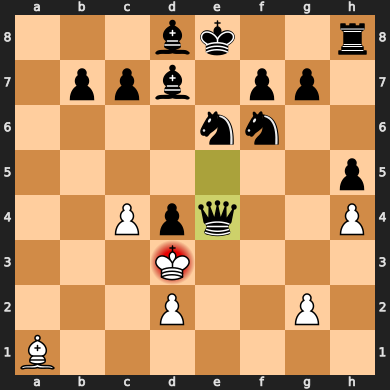

In [ ]:
board = chess.Board()
allMoves = [] #list of strings for saving moves for setting pos for stockfish

MAX_NUMBER_OF_MOVES = 150
for i in tqdm(range(MAX_NUMBER_OF_MOVES)): #set a limit for the game
	#first my ai move
	try:
		move = saved_model.predict(board)
		board.push(move)
		allMoves.append(str(move)) #add so stockfish can see
	except:
		print("game over. You lost")
		break
	# #then get stockfish move
	stockfish.set_position(allMoves)
	stockfishMove = stockfish.get_best_move_time(1)
	allMoves.append(stockfishMove)
	stockfishMove = chess.Move.from_uci(stockfishMove)
	board.push(stockfishMove)


board

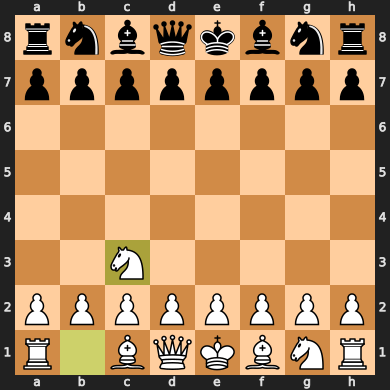

In [ ]:
#play 1 move at a time against stockfish
board = chess.Board()
stockfish.set_position([])
stockfish.set_skill_level(0)
allMoves = [] #list of strings for saving moves for setting pos for stockfish
try:
    move = saved_model.predict(board)
    board.push(move)
    allMoves.append(str(move)) #add so stockfish can see
except:
    print("game over. You lost")
board

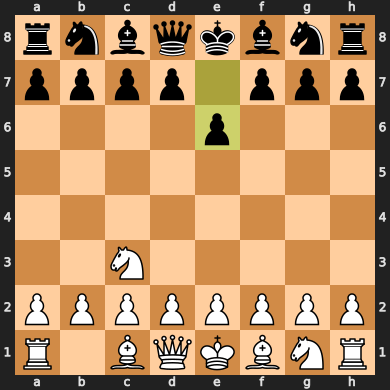

In [ ]:
stockfish.set_position(allMoves)
stockfishMove = stockfish.get_best_move_time(1)
allMoves.append(stockfishMove)
stockfishMove = chess.Move.from_uci(stockfishMove)
board.push(stockfishMove)
board

In [ ]:
stockfish.reset_engine_parameters() #reset elo rating
print(saved_model.predict(board))
stockfish.set_position([])
#play your own game
board = chess.Board()
#regret move:
board.pop()
#make my move:
moveStr = "e2e4"
move = chess.Move.from_uci(moveStr)
board.push(move)
#make ai move:
aiMove = saved_model.predict(board)
board.push(aiMove)
board

b2b4


IndexError: pop from empty list

try to play against old model

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
import gym
import gym_chess
import os
import chess
from tqdm import tqdm
from gym_chess.alphazero.move_encoding import utils
from pathlib import Path


from typing import Optional

torch.cuda.is_available()

#helper methods:



#decoding moves from idx to uci notation

def _decodeKnight(action: int) -> Optional[chess.Move]:
    _NUM_TYPES: int = 8

    #: Starting point of knight moves in last dimension of 8 x 8 x 73 action array.
    _TYPE_OFFSET: int = 56

    #: Set of possible directions for a knight move, encoded as
    #: (delta rank, delta square).
    _DIRECTIONS = utils.IndexedTuple(
        (+2, +1),
        (+1, +2),
        (-1, +2),
        (-2, +1),
        (-2, -1),
        (-1, -2),
        (+1, -2),
        (+2, -1),
    )

    from_rank, from_file, move_type = np.unravel_index(action, (8, 8, 73))

    is_knight_move = (
        _TYPE_OFFSET <= move_type
        and move_type < _TYPE_OFFSET + _NUM_TYPES
    )

    if not is_knight_move:
        return None

    knight_move_type = move_type - _TYPE_OFFSET

    delta_rank, delta_file = _DIRECTIONS[knight_move_type]

    to_rank = from_rank + delta_rank
    to_file = from_file + delta_file

    move = utils.pack(from_rank, from_file, to_rank, to_file)
    return move

def _decodeQueen(action: int) -> Optional[chess.Move]:

    _NUM_TYPES: int = 56 # = 8 directions * 7 squares max. distance

    #: Set of possible directions for a queen move, encoded as
    #: (delta rank, delta square).
    _DIRECTIONS = utils.IndexedTuple(
        (+1,  0),
        (+1, +1),
        ( 0, +1),
        (-1, +1),
        (-1,  0),
        (-1, -1),
        ( 0, -1),
        (+1, -1),
    )
    from_rank, from_file, move_type = np.unravel_index(action, (8, 8, 73))

    is_queen_move = move_type < _NUM_TYPES

    if not is_queen_move:
        return None

    direction_idx, distance_idx = np.unravel_index(
        indices=move_type,
        shape=(8,7)
    )

    direction = _DIRECTIONS[direction_idx]
    distance = distance_idx + 1

    delta_rank = direction[0] * distance
    delta_file = direction[1] * distance

    to_rank = from_rank + delta_rank
    to_file = from_file + delta_file

    move = utils.pack(from_rank, from_file, to_rank, to_file)
    return move

def _decodeUnderPromotion(action):
    _NUM_TYPES: int = 9 # = 3 directions * 3 piece types (see below)

    #: Starting point of underpromotions in last dimension of 8 x 8 x 73 action
    #: array.
    _TYPE_OFFSET: int = 64

    #: Set of possibel directions for an underpromotion, encoded as file delta.
    _DIRECTIONS = utils.IndexedTuple(
        -1,
        0,
        +1,
    )

    #: Set of possibel piece types for an underpromotion (promoting to a queen
    #: is implicitly encoded by the corresponding queen move).
    _PROMOTIONS = utils.IndexedTuple(
        chess.KNIGHT,
        chess.BISHOP,
        chess.ROOK,
    )

    from_rank, from_file, move_type = np.unravel_index(action, (8, 8, 73))

    is_underpromotion = (
        _TYPE_OFFSET <= move_type
        and move_type < _TYPE_OFFSET + _NUM_TYPES
    )

    if not is_underpromotion:
        return None

    underpromotion_type = move_type - _TYPE_OFFSET

    direction_idx, promotion_idx = np.unravel_index(
        indices=underpromotion_type,
        shape=(3,3)
    )

    direction = _DIRECTIONS[direction_idx]
    promotion = _PROMOTIONS[promotion_idx]

    to_rank = from_rank + 1
    to_file = from_file + direction

    move = utils.pack(from_rank, from_file, to_rank, to_file)
    move.promotion = promotion

    return move

#primary decoding function, the ones above are just helper functions
def decodeMove(action: int, board) -> chess.Move:
        move = _decodeQueen(action)
        is_queen_move = move is not None

        if not move:
            move = _decodeKnight(action)

        if not move:
            move = _decodeUnderPromotion(action)

        if not move:
            raise ValueError(f"{action} is not a valid action")

        # Actions encode moves from the perspective of the current player. If
        # this is the black player, the move must be reoriented.
        turn = board.turn

        if turn == False: #black to move
            move = utils.rotate(move)

        # Moving a pawn to the opponent's home rank with a queen move
        # is automatically assumed to be queen underpromotion. However,
        # since queenmoves has no reference to the board and can thus not
        # determine whether the moved piece is a pawn, we have to add this
        # information manually here
        if is_queen_move:
            to_rank = chess.square_rank(move.to_square)
            is_promoting_move = (
                (to_rank == 7 and turn == True) or
                (to_rank == 0 and turn == False)
            )


            piece = board.piece_at(move.from_square)
            if piece is None: #NOTE I added this, not entirely sure if it's correct
                return None
            is_pawn = piece.piece_type == chess.PAWN

            if is_pawn and is_promoting_move:
                move.promotion = chess.QUEEN

        return move

def encodeBoard(board: chess.Board) -> np.array:
	"""Converts a board to numpy array representation."""

	array = np.zeros((8, 8, 14), dtype=int)

	for square, piece in board.piece_map().items():
		rank, file = chess.square_rank(square), chess.square_file(square)
		piece_type, color = piece.piece_type, piece.color

		# The first six planes encode the pieces of the active player,
		# the following six those of the active player's opponent. Since
		# this class always stores boards oriented towards the white player,
		# White is considered to be the active player here.
		offset = 0 if color == chess.WHITE else 6

		# Chess enumerates piece types beginning with one, which we have
		# to account for
		idx = piece_type - 1

		array[rank, file, idx + offset] = 1

	# Repetition counters
	array[:, :, 12] = board.is_repetition(2)
	array[:, :, 13] = board.is_repetition(3)

	return array

FRACTION_OF_DATA = 1
BATCH_SIZE = 32

# Load dataset
allMoves = []
allBoards = []

files = os.listdir('data1/preparedData')
numOfEach = len(files) // 2  # Half are moves, other half are positions

for i in range(numOfEach):
    try:
        moves = np.load(f"data1/preparedData/moves{i}.npy", allow_pickle=True)
        boards = np.load(f"data1/preparedData/positions{i}.npy", allow_pickle=True)
        if len(moves) != len(boards):
            print("ERROR ON i =", i, len(moves), len(boards))
        allMoves.extend(moves)
        allBoards.extend(boards)
    except Exception as e:
        print(f"Error loading data for index {i}: {e}")

print("Length of allMoves:", len(allMoves))
print("Length of allBoards:", len(allBoards))

# Print some samples to verify data loading
print("Sample moves:", allMoves[:5])
print("Sample boards:", allBoards[:5])


allMoves = np.array(allMoves)[:(int(len(allMoves) * FRACTION_OF_DATA))]
allBoards = np.array(allBoards)[:(int(len(allBoards) * FRACTION_OF_DATA))]
assert len(allMoves) == len(allBoards), "MUST BE OF SAME LENGTH"


#flatten out boards
# allBoards = allBoards.reshape(allBoards.shape[0], -1)

trainDataIdx = int(len(allMoves) * 0.8)

#NOTE transfer all data to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
allBoards = torch.from_numpy(np.asarray(allBoards)).to(device)
allMoves = torch.from_numpy(np.asarray(allMoves)).to(device)

training_set = torch.utils.data.TensorDataset(allBoards[:trainDataIdx], allMoves[:trainDataIdx])
test_set = torch.utils.data.TensorDataset(allBoards[trainDataIdx:], allMoves[trainDataIdx:])
# Create data loaders for our datasets; shuffle for training, not for validation

training_loader = torch.utils.data.DataLoader(training_set, batch_size=BATCH_SIZE, shuffle=True)
validation_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)

print(f"loaded {len(allMoves)} moves and positions")

#model
class Model(torch.nn.Module):


    def __init__(self):
        super(Model, self).__init__()
        self.INPUT_SIZE = 896
        # self.INPUT_SIZE = 7*7*13 #NOTE changing input size for using cnns
        self.OUTPUT_SIZE = 4672 # = number of unique moves (action space)

		#can try to add CNN and pooling here (calculations taking into account spacial features)

        #input shape for sample is (8,8,14), flattened to 1d array of size 896
        # self.cnn1 = nn.Conv3d(4,4,(2,2,4), padding=(0,0,1))

        self.activation = torch.nn.Tanh()
        # self.activation = torch.nn.ReLU()

        self.linear1 = torch.nn.Linear(self.INPUT_SIZE, 1000)
        self.linear2 = torch.nn.Linear(1000, 1000)
        self.linear3 = torch.nn.Linear(1000, 1000)
        self.linear4 = torch.nn.Linear(1000, 200)
        self.linear5 = torch.nn.Linear(200, self.OUTPUT_SIZE)
        self.softmax = torch.nn.Softmax(1) #use softmax as prob for each move, dim 1 as dim 0 is the batch dimension

    def forward(self, x): #x.shape = (batch size, 896)
        x = x.to(torch.float32)
        # x = self.cnn1(x) #for using cnns
        x = x.reshape(x.shape[0], -1)
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        x = self.activation(x)
        x = self.linear4(x)
        x = self.activation(x)
        x = self.linear5(x)
        # x = self.softmax(x) #do not use softmax since you are using cross entropy loss
        return x

    def predict(self, board : chess.Board):
        """takes in a chess board and returns a chess.move object. NOTE: this function should definitely be written better, but it works for now"""
        with torch.no_grad():
            encodedBoard = encodeBoard(board)
            encodedBoard = encodedBoard.reshape(1, -1)
            encodedBoard = torch.from_numpy(encodedBoard)
            res = self.forward(encodedBoard)
            probs = self.softmax(res)

            probs = probs.numpy()[0] #do not want tensor anymore, 0 since it is a 2d array with 1 row

            #verify that move is legal and can be decoded before returning
            while len(probs) > 0: #try max 100 times, if not throw an error
                moveIdx = probs.argmax()
                try: #TODO should not have try here, but was a bug with idx 499 if it is black to move
                    uciMove = decodeMove(moveIdx, board)
                    if (uciMove is None): #could not decode
                        probs = np.delete(probs, moveIdx)
                        continue
                    move = chess.Move.from_uci(str(uciMove))
                    if (move in board.legal_moves): #if legal, return, else: loop continues after deleting the move
                        return move
                except:
                    pass
                probs = np.delete(probs, moveIdx) #TODO probably better way to do this, but it is not too time critical as it is only for predictions
                                             #remove the move so its not chosen again next iteration

            #return random move if model failed to find move
            moves = board.legal_moves
            if (len(moves) > 0):
                return np.random.choice(list(moves))
            return None #if no legal moves found, return None
            # raise Exception("Your predict function could not find any legal/decodable moves")

#helper functions for training
def train_one_epoch(model, optimizer, loss_fn, epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):

        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            # print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss


def createBestModelFile():
    #first find best model if it exists:
    path = Path('./savedModels/bestModel.txt')

    if not (path.is_file()):
        #create the files
        f = open(path, "w")
        f.write("10000000") #set to high number so it is overwritten with better loss
        f.write("\ntestPath")
        f.close()

def saveBestModel(vloss, pathToBestModel):
    f = open("./savedModels/bestModel.txt", "w")
    f.write(str(vloss.item()))
    f.write("\n")
    f.write(pathToBestModel)
    print("NEW BEST MODEL FOUND WITH LOSS:", vloss)

def retrieveBestModelInfo():
    with open('./savedModels/bestModel.txt', "r") as f:
        bestLoss_str = f.readline().strip()
        if bestLoss_str:
            bestLoss = float(bestLoss_str)
        else:
            bestLoss = float('inf')  # Set it to infinity or any default value as needed
        bestModelPath = f.readline()
    return bestLoss, bestModelPath


path = Path('./savedModels/bestModel.txt')
path.parent.mkdir(parents=True, exist_ok=True)
path.touch(exist_ok=True)

#hyperparams
EPOCHS = 500
LEARNING_RATE = 0.0001 # was 0.001
MOMENTUM = 0.9

#run training


createBestModelFile()

bestLoss, bestModelPath = retrieveBestModelInfo()


timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

model = Model()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

best_vloss = 1_000_000.

for epoch in tqdm(range(EPOCHS)):
    if (epoch_number % 5 == 0):
        print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(model, optimizer, loss_fn, epoch_number, writer)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.

    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)

            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)

    #only print every 5 epochs
    if epoch_number % 5 == 0:
        print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss

        if (bestLoss > best_vloss): #if better than previous best loss from all models created, save it
            model_path = 'savedModels/model_{}_{}'.format(timestamp, epoch_number)
            torch.save(model.state_dict(), model_path)
            saveBestModel(best_vloss, model_path)



    epoch_number += 1

# print("\n\nBEST VALIDATION LOSS FOR ALL MODELS: ", bestLoss)